In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# **IMPORT NECCESSARY PACKAGES**

In [1]:
!pip install ultralytics
!pip install roboflow
from ultralytics import YOLO 
from IPython.display import Image
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.1.1 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5359.5/8062.4 GB disk)


# **LOAD THE TRAINING DATASET**

In [2]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="peAtdpeJN9JbTS3jM8EV")
project = rf.workspace("pidray-8gl3p").project("pidray-bbmo7")
dataset = project.version(3).download("yolov8")

A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.1.1, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to PIDRAY-3 in yolov8:: 100%|██████████| 19974/19974 [00:02<00:00, 8173.32it/s] 


# **LOAD THE MODEL**

In [3]:
yolo8_model_detection =YOLO('yolov8s.pt')

100%|██████████| 21.5M/21.5M [00:00<00:00, 160MB/s] 


# **COPY DATASET IN A NEW DIRECTORY**

In [6]:
import os 
os.makedirs('datasets',exist_ok = True)
!cp -r /kaggle/working/PIDRAY-3 datasets/sixray100-1

# **TRAIN MODEL**

In [7]:
yolo8_model_detection.train(data='/kaggle/working/datasets/sixray100-1/data.yaml', epochs=150, imgsz=640, batch=64, project='YOLO_weights',name='SIXray_Output',exist_ok=True)

Ultralytics YOLOv8.1.1 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/kaggle/working/datasets/sixray100-1/data.yaml, epochs=150, time=None, patience=50, batch=64, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=YOLO_weights, name=SIXray_Output, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels

100%|██████████| 755k/755k [00:00<00:00, 14.5MB/s]
2024-01-15 09:07:46,445	INFO util.py:129 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-01-15 09:07:47,115	INFO util.py:129 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=10

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytic

100%|██████████| 6.23M/6.23M [00:00<00:00, 68.9MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/working/datasets/sixray100-1/PIDRAY-3/train/labels... 7741 images, 1258 backgrounds, 0 corrupt: 100%|██████████| 7741/7741 [00:05<00:00, 1324.34it/s]


train: New cache created: /kaggle/working/datasets/sixray100-1/PIDRAY-3/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/working/datasets/sixray100-1/PIDRAY-3/valid/labels... 1537 images, 25 backgrounds, 0 corrupt: 100%|██████████| 1537/1537 [00:01<00:00, 1327.92it/s]


val: New cache created: /kaggle/working/datasets/sixray100-1/PIDRAY-3/valid/labels.cache
Plotting labels to YOLO_weights/SIXray_Output/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
150 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/150      13.6G      1.513      4.943      1.588        115        640: 100%|██████████| 121/121 [01:44<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.11it/s]


                   all       1537       1627      0.374      0.229      0.133     0.0941

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/150      14.5G      1.216       1.76      1.335        120        640: 100%|██████████| 121/121 [01:43<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:10<00:00,  1.26it/s]

                   all       1537       1627      0.629      0.316       0.29      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/150      14.4G      1.298       1.66      1.359        116        640: 100%|██████████| 121/121 [01:44<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:10<00:00,  1.28it/s]

                   all       1537       1627      0.172     0.0311     0.0192    0.00925



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/150      14.4G      1.427      1.799      1.447        117        640: 100%|██████████| 121/121 [01:44<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:10<00:00,  1.26it/s]


                   all       1537       1627      0.271       0.27      0.235      0.138

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/150      14.4G      1.381      1.654      1.421        103        640: 100%|██████████| 121/121 [01:44<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:10<00:00,  1.23it/s]

                   all       1537       1627      0.599      0.251      0.314      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/150      14.7G      1.311       1.51      1.375         96        640: 100%|██████████| 121/121 [01:44<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:09<00:00,  1.30it/s]

                   all       1537       1627      0.475      0.336       0.32      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/150      14.4G      1.266      1.431      1.342        115        640: 100%|██████████| 121/121 [01:44<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:10<00:00,  1.28it/s]

                   all       1537       1627      0.556      0.406      0.425      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/150      14.5G      1.216      1.343       1.31        113        640: 100%|██████████| 121/121 [01:44<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:10<00:00,  1.22it/s]

                   all       1537       1627      0.651      0.373      0.415      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/150      14.4G      1.189      1.284      1.291        127        640: 100%|██████████| 121/121 [01:44<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:10<00:00,  1.26it/s]

                   all       1537       1627      0.589      0.371      0.405      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/150      14.7G      1.168       1.23      1.276        149        640: 100%|██████████| 121/121 [01:44<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:10<00:00,  1.25it/s]

                   all       1537       1627      0.717      0.463      0.491      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/150      14.8G      1.129      1.187      1.256        116        640: 100%|██████████| 121/121 [01:44<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:10<00:00,  1.27it/s]

                   all       1537       1627       0.73      0.457      0.465      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/150      14.4G      1.107      1.159      1.245        112        640: 100%|██████████| 121/121 [01:44<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:10<00:00,  1.29it/s]

                   all       1537       1627      0.736      0.473      0.513      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/150      14.4G      1.092      1.113      1.227        109        640: 100%|██████████| 121/121 [01:44<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:10<00:00,  1.28it/s]

                   all       1537       1627      0.617        0.5      0.454      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/150      14.4G      1.064      1.081      1.213        112        640: 100%|██████████| 121/121 [01:44<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:10<00:00,  1.27it/s]

                   all       1537       1627      0.753      0.495      0.531      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/150      14.4G      1.044      1.044      1.203        119        640: 100%|██████████| 121/121 [01:44<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:10<00:00,  1.29it/s]

                   all       1537       1627      0.706      0.567      0.577       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/150      14.4G      1.052      1.035      1.199        111        640: 100%|██████████| 121/121 [01:44<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:10<00:00,  1.26it/s]

                   all       1537       1627      0.721      0.554      0.552      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/150      14.4G      1.019     0.9955      1.185        116        640: 100%|██████████| 121/121 [01:44<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:10<00:00,  1.29it/s]

                   all       1537       1627      0.726      0.462      0.522      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/150      14.4G      1.024     0.9864      1.183        151        640: 100%|██████████| 121/121 [01:44<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:10<00:00,  1.30it/s]

                   all       1537       1627      0.793      0.525      0.556      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/150      14.4G      1.009     0.9779      1.173        129        640: 100%|██████████| 121/121 [01:44<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:10<00:00,  1.26it/s]

                   all       1537       1627      0.748      0.542      0.576      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/150      14.5G      1.001     0.9459      1.164        124        640: 100%|██████████| 121/121 [01:44<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:10<00:00,  1.29it/s]

                   all       1537       1627      0.766      0.497      0.568      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/150      14.4G     0.9699     0.9108      1.149        136        640: 100%|██████████| 121/121 [01:44<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:10<00:00,  1.28it/s]

                   all       1537       1627      0.672      0.538       0.56      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/150      14.4G     0.9746     0.9143      1.153        121        640: 100%|██████████| 121/121 [01:44<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:10<00:00,  1.28it/s]

                   all       1537       1627      0.786      0.494      0.577      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/150      14.4G     0.9625     0.9005      1.143        116        640: 100%|██████████| 121/121 [01:44<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:09<00:00,  1.31it/s]

                   all       1537       1627      0.761      0.561      0.601      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/150      14.5G     0.9612      0.888      1.145        139        640: 100%|██████████| 121/121 [01:44<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:10<00:00,  1.27it/s]

                   all       1537       1627      0.865      0.493      0.575      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/150      14.4G     0.9447     0.8784       1.14        149        640: 100%|██████████| 121/121 [01:44<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:10<00:00,  1.30it/s]

                   all       1537       1627      0.666      0.506      0.576      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/150      14.4G     0.9305     0.8577      1.121        122        640: 100%|██████████| 121/121 [01:44<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:10<00:00,  1.29it/s]

                   all       1537       1627       0.76      0.555      0.566      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/150      14.7G      0.926     0.8428      1.126        116        640: 100%|██████████| 121/121 [01:44<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:10<00:00,  1.28it/s]

                   all       1537       1627      0.814      0.501      0.565      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/150      14.3G     0.9238     0.8327      1.122        105        640: 100%|██████████| 121/121 [01:44<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:09<00:00,  1.32it/s]

                   all       1537       1627      0.854      0.563      0.604      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/150      14.5G     0.9062     0.8222      1.107        116        640: 100%|██████████| 121/121 [01:44<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:10<00:00,  1.27it/s]

                   all       1537       1627      0.733      0.564      0.621      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/150      14.4G     0.8954     0.8032      1.101        135        640: 100%|██████████| 121/121 [01:44<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:10<00:00,  1.28it/s]

                   all       1537       1627      0.802      0.605      0.647      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/150      14.4G     0.9042     0.8094      1.111        128        640: 100%|██████████| 121/121 [01:44<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:09<00:00,  1.30it/s]

                   all       1537       1627      0.753      0.547      0.619      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/150      14.4G     0.8851     0.7884      1.098        129        640: 100%|██████████| 121/121 [01:44<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:10<00:00,  1.28it/s]

                   all       1537       1627      0.719      0.636      0.678      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/150      14.4G     0.8822     0.7837      1.098        108        640: 100%|██████████| 121/121 [01:44<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:10<00:00,  1.28it/s]

                   all       1537       1627      0.785       0.63      0.653      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/150      14.4G     0.8708     0.7755      1.089        127        640: 100%|██████████| 121/121 [01:44<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:10<00:00,  1.28it/s]

                   all       1537       1627      0.664      0.656      0.622      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/150      14.4G     0.8774     0.7826      1.094        147        640: 100%|██████████| 121/121 [01:45<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:10<00:00,  1.30it/s]

                   all       1537       1627      0.865      0.631      0.691      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/150      14.4G     0.8609     0.7555      1.084        122        640: 100%|██████████| 121/121 [01:44<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:10<00:00,  1.27it/s]

                   all       1537       1627      0.871      0.578      0.654      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/150      14.4G     0.8586     0.7542      1.086        129        640: 100%|██████████| 121/121 [01:45<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:10<00:00,  1.28it/s]

                   all       1537       1627      0.902       0.59      0.656      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/150      14.4G      0.854     0.7478       1.08        144        640: 100%|██████████| 121/121 [01:44<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:10<00:00,  1.27it/s]

                   all       1537       1627      0.867      0.578      0.675      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/150      14.4G     0.8487     0.7374      1.078        128        640: 100%|██████████| 121/121 [01:44<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:10<00:00,  1.29it/s]

                   all       1537       1627        0.9      0.627      0.709      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/150      14.4G     0.8407     0.7414      1.073        110        640: 100%|██████████| 121/121 [01:44<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:09<00:00,  1.31it/s]

                   all       1537       1627      0.752        0.7      0.696      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/150      14.4G     0.8357     0.7223       1.07        110        640: 100%|██████████| 121/121 [01:44<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:10<00:00,  1.30it/s]

                   all       1537       1627      0.887      0.557      0.647      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/150      14.7G     0.8302     0.7231      1.063        104        640: 100%|██████████| 121/121 [01:45<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:09<00:00,  1.31it/s]

                   all       1537       1627      0.844       0.59      0.646      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/150      14.4G     0.8236     0.7113      1.065        120        640: 100%|██████████| 121/121 [01:44<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:10<00:00,  1.27it/s]

                   all       1537       1627      0.879      0.664       0.73        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/150      14.5G     0.8265     0.7144      1.064        119        640: 100%|██████████| 121/121 [01:44<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:10<00:00,  1.30it/s]

                   all       1537       1627      0.882      0.603       0.75      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/150      14.4G     0.8219     0.7094      1.063        136        640: 100%|██████████| 121/121 [01:44<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:09<00:00,  1.31it/s]

                   all       1537       1627      0.811      0.635      0.699       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/150      14.5G     0.8149     0.6985      1.061        128        640: 100%|██████████| 121/121 [01:44<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:09<00:00,  1.31it/s]

                   all       1537       1627      0.874      0.613      0.708      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/150      14.4G     0.8114     0.6907       1.05        120        640: 100%|██████████| 121/121 [01:44<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:09<00:00,  1.31it/s]

                   all       1537       1627      0.878       0.67      0.728      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/150      14.4G     0.8049     0.6798      1.047        139        640: 100%|██████████| 121/121 [01:44<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:09<00:00,  1.31it/s]

                   all       1537       1627      0.832       0.64      0.729        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/150      14.4G     0.8011     0.6695      1.047        109        640: 100%|██████████| 121/121 [01:44<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:10<00:00,  1.29it/s]

                   all       1537       1627      0.877      0.642       0.72      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/150      14.4G     0.7959     0.6691      1.046        125        640: 100%|██████████| 121/121 [01:44<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:09<00:00,  1.31it/s]

                   all       1537       1627       0.88      0.645      0.707      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/150      14.4G     0.7893     0.6637      1.042        112        640: 100%|██████████| 121/121 [01:44<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:10<00:00,  1.29it/s]

                   all       1537       1627      0.854      0.633      0.691      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/150      14.4G     0.7902     0.6585      1.044        116        640: 100%|██████████| 121/121 [01:44<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:09<00:00,  1.32it/s]

                   all       1537       1627      0.844      0.691      0.717      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/150      14.4G     0.7885     0.6575      1.037        137        640: 100%|██████████| 121/121 [01:44<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:09<00:00,  1.32it/s]

                   all       1537       1627      0.899      0.594      0.669      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/150      14.4G     0.7788     0.6515      1.038        128        640: 100%|██████████| 121/121 [01:44<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:09<00:00,  1.31it/s]

                   all       1537       1627      0.875      0.673      0.739       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/150      14.4G     0.7758     0.6489      1.034        131        640: 100%|██████████| 121/121 [01:44<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:10<00:00,  1.26it/s]

                   all       1537       1627      0.902      0.603      0.742      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/150      14.4G     0.7746      0.647       1.04        124        640: 100%|██████████| 121/121 [01:44<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:09<00:00,  1.30it/s]

                   all       1537       1627      0.887      0.667      0.751      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/150      14.7G     0.7705     0.6425      1.031        121        640: 100%|██████████| 121/121 [01:45<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:10<00:00,  1.28it/s]

                   all       1537       1627      0.855      0.682      0.759      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/150      14.4G     0.7703     0.6411      1.032        127        640: 100%|██████████| 121/121 [01:44<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:10<00:00,  1.30it/s]

                   all       1537       1627      0.924      0.658      0.761      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/150      14.4G     0.7702     0.6369       1.03        122        640: 100%|██████████| 121/121 [01:44<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:10<00:00,  1.30it/s]

                   all       1537       1627      0.869      0.667      0.774      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/150      14.4G     0.7635     0.6355      1.031        113        640: 100%|██████████| 121/121 [01:45<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:09<00:00,  1.30it/s]

                   all       1537       1627      0.924      0.617      0.761      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/150      14.4G     0.7553     0.6237      1.027        120        640: 100%|██████████| 121/121 [01:44<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:09<00:00,  1.31it/s]

                   all       1537       1627      0.886      0.669      0.763      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/150      14.4G     0.7462     0.6076      1.021        151        640: 100%|██████████| 121/121 [01:44<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:09<00:00,  1.30it/s]

                   all       1537       1627      0.719      0.734       0.75      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/150      14.4G     0.7423     0.6132      1.018        114        640: 100%|██████████| 121/121 [01:44<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:09<00:00,  1.31it/s]

                   all       1537       1627      0.877      0.685      0.761      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/150      14.4G     0.7497     0.6138      1.024        138        640: 100%|██████████| 121/121 [01:44<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:09<00:00,  1.33it/s]

                   all       1537       1627       0.87      0.679      0.781      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/150      14.4G     0.7483     0.6104      1.023        126        640: 100%|██████████| 121/121 [01:44<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:09<00:00,  1.32it/s]

                   all       1537       1627      0.882      0.638      0.776       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/150      14.4G     0.7377     0.6042      1.016        131        640: 100%|██████████| 121/121 [01:44<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:10<00:00,  1.29it/s]

                   all       1537       1627      0.896      0.663      0.774      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/150      14.4G     0.7356     0.5918      1.017        112        640: 100%|██████████| 121/121 [01:45<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:09<00:00,  1.30it/s]

                   all       1537       1627      0.859      0.673      0.774      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/150      14.5G     0.7287     0.5928      1.013        103        640: 100%|██████████| 121/121 [01:44<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:10<00:00,  1.28it/s]

                   all       1537       1627      0.812      0.719      0.787      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/150      14.4G     0.7311     0.5955       1.01        126        640: 100%|██████████| 121/121 [01:45<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:10<00:00,  1.30it/s]

                   all       1537       1627      0.903      0.679      0.757      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/150      14.4G     0.7272     0.5845      1.011        128        640: 100%|██████████| 121/121 [01:44<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:09<00:00,  1.31it/s]

                   all       1537       1627       0.92      0.657      0.769      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/150      14.4G      0.729     0.5867       1.01        127        640: 100%|██████████| 121/121 [01:44<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:09<00:00,  1.32it/s]

                   all       1537       1627      0.949      0.648      0.781      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/150      14.7G     0.7229     0.5835      1.005        129        640: 100%|██████████| 121/121 [01:44<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:09<00:00,  1.30it/s]

                   all       1537       1627      0.906      0.652      0.769      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/150      14.4G     0.7153     0.5731      1.005        121        640: 100%|██████████| 121/121 [01:44<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:10<00:00,  1.30it/s]

                   all       1537       1627      0.881      0.674      0.799      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/150      14.4G     0.7098     0.5694     0.9993        129        640: 100%|██████████| 121/121 [01:44<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:10<00:00,  1.30it/s]

                   all       1537       1627      0.926      0.631      0.762      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/150      14.4G     0.7105     0.5744      1.002        102        640: 100%|██████████| 121/121 [01:44<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:10<00:00,  1.29it/s]

                   all       1537       1627      0.822      0.674      0.765      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/150      14.5G     0.7089     0.5632     0.9964        126        640: 100%|██████████| 121/121 [01:45<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:09<00:00,  1.30it/s]

                   all       1537       1627      0.934       0.64      0.767      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/150      14.4G     0.7049     0.5654     0.9956        117        640: 100%|██████████| 121/121 [01:44<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:10<00:00,  1.29it/s]

                   all       1537       1627      0.932      0.657       0.75      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/150      14.4G     0.7066     0.5595     0.9978        159        640: 100%|██████████| 121/121 [01:44<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:09<00:00,  1.33it/s]

                   all       1537       1627      0.908       0.66      0.737      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/150      14.4G     0.7013     0.5619     0.9952        122        640: 100%|██████████| 121/121 [01:45<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:09<00:00,  1.30it/s]

                   all       1537       1627      0.894       0.65      0.764      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/150      14.4G     0.6934     0.5497     0.9908        109        640: 100%|██████████| 121/121 [01:45<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:09<00:00,  1.30it/s]

                   all       1537       1627      0.852      0.671      0.754      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/150      14.4G     0.6876     0.5412     0.9859        136        640: 100%|██████████| 121/121 [01:44<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:09<00:00,  1.30it/s]

                   all       1537       1627       0.79      0.679      0.766      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/150      14.5G     0.6975     0.5467     0.9955        122        640: 100%|██████████| 121/121 [01:44<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:10<00:00,  1.28it/s]

                   all       1537       1627      0.867      0.655      0.768      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/150      14.4G     0.6804     0.5372     0.9886        138        640: 100%|██████████| 121/121 [01:45<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:09<00:00,  1.31it/s]

                   all       1537       1627      0.931       0.64       0.77      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/150      14.4G     0.6823     0.5382     0.9898        103        640: 100%|██████████| 121/121 [01:45<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:09<00:00,  1.31it/s]

                   all       1537       1627      0.919      0.643      0.775      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/150      14.4G     0.6804      0.538     0.9875        135        640: 100%|██████████| 121/121 [01:45<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:10<00:00,  1.29it/s]

                   all       1537       1627      0.927      0.647      0.786      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/150      14.5G      0.683     0.5352      0.984        113        640: 100%|██████████| 121/121 [01:44<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:09<00:00,  1.31it/s]

                   all       1537       1627      0.907      0.666      0.778      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/150      14.7G     0.6823     0.5339     0.9852        130        640: 100%|██████████| 121/121 [01:45<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:09<00:00,  1.32it/s]

                   all       1537       1627      0.893      0.671      0.807      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/150      14.4G     0.6751     0.5279     0.9816        134        640: 100%|██████████| 121/121 [01:44<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:09<00:00,  1.32it/s]

                   all       1537       1627      0.922      0.678      0.795       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/150      14.4G     0.6658     0.5247     0.9808        134        640: 100%|██████████| 121/121 [01:44<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:09<00:00,  1.33it/s]

                   all       1537       1627      0.917      0.679      0.778      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/150      14.4G     0.6686     0.5213       0.98        130        640: 100%|██████████| 121/121 [01:44<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:09<00:00,  1.33it/s]

                   all       1537       1627      0.917      0.689      0.798      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/150      14.4G     0.6654     0.5199     0.9813        133        640: 100%|██████████| 121/121 [01:44<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:10<00:00,  1.29it/s]

                   all       1537       1627      0.935      0.685      0.802      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/150      14.4G     0.6664     0.5214     0.9784        138        640: 100%|██████████| 121/121 [01:44<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:09<00:00,  1.32it/s]

                   all       1537       1627      0.761       0.74      0.797      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/150      14.4G     0.6576     0.5137     0.9765        128        640: 100%|██████████| 121/121 [01:44<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:09<00:00,  1.30it/s]

                   all       1537       1627      0.721       0.73      0.786      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/150      15.5G     0.6582     0.5106     0.9758        149        640: 100%|██████████| 121/121 [01:44<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:09<00:00,  1.33it/s]

                   all       1537       1627      0.907       0.66      0.777      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/150      15.5G     0.6548     0.5037     0.9746        134        640: 100%|██████████| 121/121 [01:44<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:10<00:00,  1.24it/s]

                   all       1537       1627      0.709      0.746      0.793      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/150      14.3G     0.6513     0.5031     0.9714         90        640: 100%|██████████| 121/121 [01:45<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:10<00:00,  1.27it/s]

                   all       1537       1627      0.706      0.741      0.803      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/150      14.4G     0.6512     0.5035     0.9734        120        640: 100%|██████████| 121/121 [01:46<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:10<00:00,  1.27it/s]

                   all       1537       1627      0.925      0.663      0.789      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/150      14.4G      0.643     0.4995     0.9738        124        640: 100%|██████████| 121/121 [01:45<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:10<00:00,  1.27it/s]

                   all       1537       1627      0.926      0.662      0.777      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/150      14.4G     0.6282     0.4866      0.963        123        640: 100%|██████████| 121/121 [01:44<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:09<00:00,  1.31it/s]

                   all       1537       1627      0.923      0.654      0.773      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/150      14.4G     0.6335     0.4893     0.9671        138        640: 100%|██████████| 121/121 [01:44<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:09<00:00,  1.32it/s]

                   all       1537       1627      0.873      0.674      0.787      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/150      14.6G     0.6348     0.4849     0.9666        138        640: 100%|██████████| 121/121 [01:44<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:09<00:00,  1.31it/s]

                   all       1537       1627      0.819      0.687      0.774       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/150      14.7G     0.6336      0.487      0.969        132        640: 100%|██████████| 121/121 [01:45<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:09<00:00,  1.33it/s]

                   all       1537       1627      0.824      0.689      0.766      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/150      14.4G     0.6261     0.4829     0.9643        119        640: 100%|██████████| 121/121 [01:44<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:09<00:00,  1.31it/s]

                   all       1537       1627      0.685      0.708      0.766      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/150      14.4G     0.6255     0.4751     0.9608        113        640: 100%|██████████| 121/121 [01:44<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:10<00:00,  1.28it/s]

                   all       1537       1627      0.853      0.692      0.776      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/150      14.4G     0.6212     0.4687     0.9589        104        640: 100%|██████████| 121/121 [01:44<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:09<00:00,  1.31it/s]

                   all       1537       1627      0.701      0.765      0.772      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/150      14.5G     0.6187     0.4739     0.9616        115        640: 100%|██████████| 121/121 [01:44<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:09<00:00,  1.33it/s]

                   all       1537       1627      0.869      0.691      0.761      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/150      14.4G     0.6124     0.4641     0.9579        120        640: 100%|██████████| 121/121 [01:44<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:09<00:00,  1.30it/s]

                   all       1537       1627      0.728        0.7      0.762       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/150      14.4G     0.6162     0.4694     0.9603        124        640: 100%|██████████| 121/121 [01:44<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:09<00:00,  1.32it/s]

                   all       1537       1627      0.837      0.693      0.762      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/150      14.3G     0.6196     0.4681     0.9614        110        640: 100%|██████████| 121/121 [01:44<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:09<00:00,  1.31it/s]

                   all       1537       1627      0.838      0.697      0.761      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/150      14.4G     0.6138     0.4663     0.9603        145        640: 100%|██████████| 121/121 [01:44<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:09<00:00,  1.32it/s]

                   all       1537       1627      0.846      0.699      0.769      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/150      14.4G     0.6094     0.4612     0.9532        131        640: 100%|██████████| 121/121 [01:44<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:10<00:00,  1.30it/s]

                   all       1537       1627       0.86      0.692      0.775      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/150      14.4G     0.6004      0.453     0.9497        105        640: 100%|██████████| 121/121 [01:44<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:10<00:00,  1.26it/s]

                   all       1537       1627       0.86      0.696      0.774      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/150      14.4G     0.6058     0.4598     0.9518        125        640: 100%|██████████| 121/121 [01:45<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:09<00:00,  1.31it/s]

                   all       1537       1627       0.88      0.678      0.767      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/150      14.4G     0.6001     0.4529     0.9474        118        640: 100%|██████████| 121/121 [01:44<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:10<00:00,  1.29it/s]

                   all       1537       1627      0.707      0.744      0.771      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/150      14.4G     0.5908     0.4478     0.9478        122        640: 100%|██████████| 121/121 [01:44<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:10<00:00,  1.29it/s]

                   all       1537       1627      0.705      0.741      0.767      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/150      14.4G     0.5872     0.4501     0.9456        124        640: 100%|██████████| 121/121 [01:45<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:10<00:00,  1.29it/s]

                   all       1537       1627      0.889      0.669      0.765      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/150      14.8G     0.5864     0.4383     0.9482        119        640: 100%|██████████| 121/121 [01:45<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:09<00:00,  1.32it/s]

                   all       1537       1627      0.889      0.669      0.771      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/150      14.4G      0.589     0.4434     0.9471        119        640: 100%|██████████| 121/121 [01:44<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:10<00:00,  1.30it/s]

                   all       1537       1627      0.858      0.688      0.765      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/150      14.4G     0.5847     0.4382     0.9447        116        640: 100%|██████████| 121/121 [01:44<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:09<00:00,  1.32it/s]

                   all       1537       1627      0.831      0.712      0.767      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/150      14.4G     0.5781     0.4322     0.9397        122        640: 100%|██████████| 121/121 [01:44<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:09<00:00,  1.30it/s]

                   all       1537       1627      0.831      0.707      0.769      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/150      14.3G     0.5765     0.4289     0.9386        114        640: 100%|██████████| 121/121 [01:44<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:10<00:00,  1.30it/s]

                   all       1537       1627      0.876      0.713       0.78      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/150      14.4G     0.5755     0.4261      0.939        121        640: 100%|██████████| 121/121 [01:44<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:09<00:00,  1.31it/s]

                   all       1537       1627      0.872      0.709      0.782       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/150      14.4G     0.5687     0.4259     0.9374        124        640: 100%|██████████| 121/121 [01:45<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:10<00:00,  1.29it/s]

                   all       1537       1627      0.877      0.704      0.783      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/150      14.4G     0.5656     0.4237     0.9366        128        640: 100%|██████████| 121/121 [01:45<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:09<00:00,  1.30it/s]

                   all       1537       1627      0.876      0.701      0.781      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/150      14.4G     0.5658     0.4214     0.9361        125        640: 100%|██████████| 121/121 [01:45<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:09<00:00,  1.31it/s]

                   all       1537       1627      0.876      0.699       0.78      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/150      14.4G     0.5635     0.4179     0.9382        125        640: 100%|██████████| 121/121 [01:45<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:10<00:00,  1.29it/s]

                   all       1537       1627      0.877      0.697      0.779      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/150      14.4G     0.5596     0.4146     0.9333         96        640: 100%|██████████| 121/121 [01:44<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:09<00:00,  1.33it/s]

                   all       1537       1627      0.759      0.718       0.78      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/150      14.4G     0.5588     0.4128     0.9325        112        640: 100%|██████████| 121/121 [01:44<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:09<00:00,  1.33it/s]

                   all       1537       1627      0.762      0.719      0.781      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/150      14.4G     0.5566      0.414     0.9322        126        640: 100%|██████████| 121/121 [01:44<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:09<00:00,  1.31it/s]

                   all       1537       1627      0.872      0.697      0.767      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/150      14.5G     0.5551     0.4089     0.9318        130        640: 100%|██████████| 121/121 [01:44<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:09<00:00,  1.33it/s]

                   all       1537       1627      0.769      0.717      0.771      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/150      14.4G     0.5509     0.4059     0.9289        140        640: 100%|██████████| 121/121 [01:44<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:09<00:00,  1.31it/s]

                   all       1537       1627      0.769      0.715      0.771      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/150      14.7G     0.5412     0.4028      0.928        125        640: 100%|██████████| 121/121 [01:44<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:09<00:00,  1.33it/s]

                   all       1537       1627      0.776      0.721      0.772      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/150      14.4G     0.5492     0.4049     0.9296        125        640: 100%|██████████| 121/121 [01:44<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:09<00:00,  1.31it/s]

                   all       1537       1627      0.769      0.733      0.771      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/150      14.4G     0.5355     0.3968      0.925        112        640: 100%|██████████| 121/121 [01:44<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:09<00:00,  1.35it/s]

                   all       1537       1627       0.77      0.734      0.771      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/150      14.4G     0.5437     0.4021     0.9305        116        640: 100%|██████████| 121/121 [01:44<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:09<00:00,  1.33it/s]

                   all       1537       1627      0.775      0.719      0.767      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/150      14.4G     0.5356     0.3946     0.9245        129        640: 100%|██████████| 121/121 [01:44<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:09<00:00,  1.32it/s]

                   all       1537       1627      0.774      0.717      0.767      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/150      14.4G     0.5343     0.3875     0.9219        136        640: 100%|██████████| 121/121 [01:44<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:09<00:00,  1.32it/s]

                   all       1537       1627      0.773      0.719      0.765      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/150      14.4G      0.533      0.393     0.9233        128        640: 100%|██████████| 121/121 [01:44<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:09<00:00,  1.32it/s]

                   all       1537       1627       0.77       0.72      0.766      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/150      14.4G     0.5206     0.3846     0.9225        126        640: 100%|██████████| 121/121 [01:44<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:09<00:00,  1.33it/s]

                   all       1537       1627      0.769      0.719      0.767      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/150      14.4G     0.5237     0.3837     0.9221        130        640: 100%|██████████| 121/121 [01:44<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:09<00:00,  1.33it/s]

                   all       1537       1627      0.756       0.73      0.767      0.657


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/150      13.5G     0.4155     0.2639     0.8391         61        640: 100%|██████████| 121/121 [01:47<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:09<00:00,  1.33it/s]

                   all       1537       1627      0.759      0.731      0.768      0.658
Stopping training early as no improvement observed in last 50 epochs. Best results observed at epoch 91, best model saved as best.pt.
To update EarlyStopping(patience=50) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



141 epochs completed in 4.548 hours.
Optimizer stripped from YOLO_weights/SIXray_Output/weights/last.pt, 22.5MB
Optimizer stripped from YOLO_weights/SIXray_Output/weights/best.pt, 22.5MB

Validating YOLO_weights/SIXray_Output/weights/best.pt...
Ultralytics YOLOv8.1.1 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11129454 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:13<00:00,  1.02s/it]


                   all       1537       1627      0.935      0.686      0.802       0.67
                 Baton       1537          4          1          0      0.578      0.252
                Bullet       1537          9      0.933      0.111      0.248      0.191
                   Gun       1537         17      0.743      0.706      0.767      0.656
                Hammer       1537        960      0.999      0.933      0.993      0.953
             HandCuffs       1537         13          1      0.845      0.919      0.837
                 Knife       1537         13      0.886      0.769      0.854      0.723
               Lighter       1537         16      0.891       0.75      0.733      0.587
                Pliers       1537        375       0.98      0.928      0.988      0.887
             Powerbank       1537         49      0.944      0.918      0.973      0.797
              Scissors       1537        171      0.973      0.895      0.967      0.815
Speed: 0.6ms preproce

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x79683b52d6c0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.0

# **VALIDATE MODEL**

In [11]:
# Load a model
#model = YOLO('path/to/best.pt')  # load a custom model
# Validate the model
metrics = yolo8_model_detection.val()  # no arguments needed, dataset and settings remembered
metrics.box.map    # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
metrics.box.maps   # a list contains map50-95 of each category

Ultralytics YOLOv8.1.1 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /kaggle/working/datasets/sixray100-1/PIDRAY-3/valid/labels.cache... 1537 images, 25 backgrounds, 0 corrupt: 100%|██████████| 1537/1537 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:13<00:00,  1.89it/s]


                   all       1537       1627      0.898       0.65      0.739      0.604
                 Baton       1537          4          1          0      0.267       0.16
                Bullet       1537          9          1      0.164      0.291      0.151
                   Gun       1537         17      0.435      0.647      0.598      0.531
                Hammer       1537        960      0.998      0.908      0.992      0.942
             HandCuffs       1537         13          1      0.905      0.941       0.81
                 Knife       1537         13      0.932      0.462      0.692      0.481
               Lighter       1537         16      0.691      0.688      0.675      0.531
                Pliers       1537        375      0.983      0.921      0.984      0.878
             Powerbank       1537         49      0.959      0.952      0.987      0.774
              Scissors       1537        171      0.986      0.853      0.965      0.779
Speed: 0.7ms preproce

array([    0.16041,     0.15107,     0.53106,     0.94224,     0.80974,     0.48091,     0.53088,     0.87794,     0.77399,     0.77916])

# **TESTING MODEL**


image 1/703 /kaggle/working/PIDRAY-3/test/images/xray_23727_png.rf.60d1c5be783f92da65107fcee8eef836.jpg: 608x640 1 Hammer, 99.2ms
image 2/703 /kaggle/working/PIDRAY-3/test/images/xray_23887_png.rf.c6d13016a52a1944cd78d76612e8ce1d.jpg: 640x640 (no detections), 8.0ms
image 3/703 /kaggle/working/PIDRAY-3/test/images/xray_23888_png.rf.e418610f9ea47c4fae3a5e5fae317f7b.jpg: 480x640 1 Hammer, 93.3ms
image 4/703 /kaggle/working/PIDRAY-3/test/images/xray_23890_png.rf.b74b1ca97d05cdd365953dd881cc440e.jpg: 480x640 1 HandCuffs, 6.3ms
image 5/703 /kaggle/working/PIDRAY-3/test/images/xray_23891_png.rf.6e420733a31c0db4c601f246f52d1b19.jpg: 416x640 (no detections), 89.0ms
image 6/703 /kaggle/working/PIDRAY-3/test/images/xray_23892_png.rf.0b07c8f337874b55451f39d618f2d2c8.jpg: 512x640 1 Hammer, 103.3ms
image 7/703 /kaggle/working/PIDRAY-3/test/images/xray_23893_png.rf.cf68d8f69d036634178b9e2f3afd64c0.jpg: 480x640 1 Hammer, 11.2ms
image 8/703 /kaggle/working/PIDRAY-3/test/images/xray_23894_png.rf.2f66ed

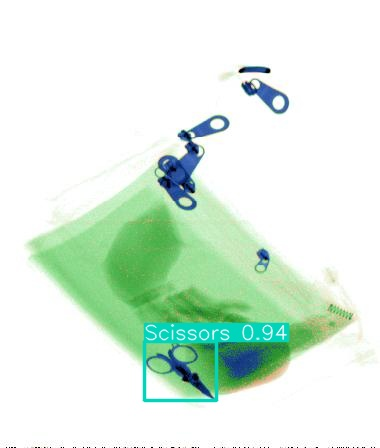

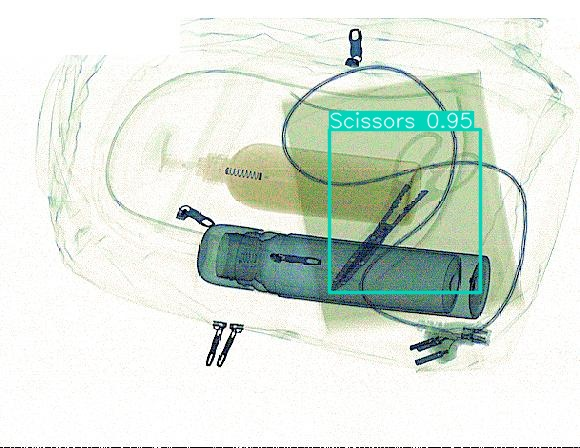

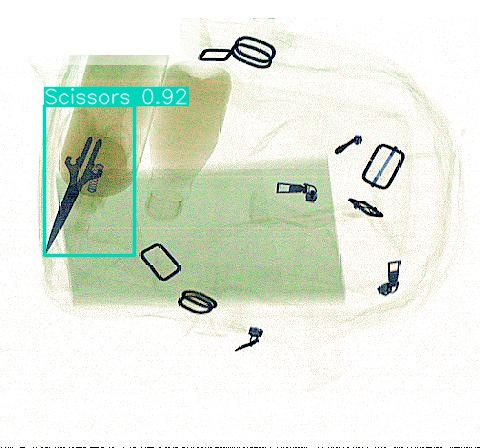

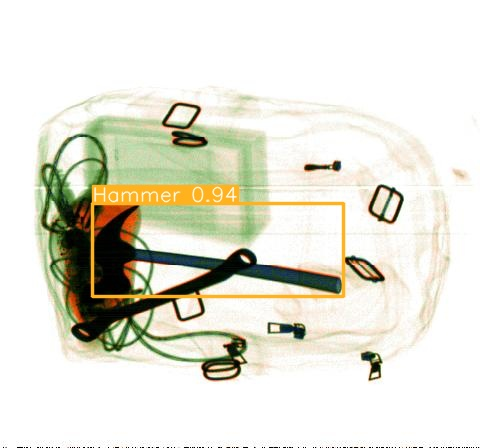

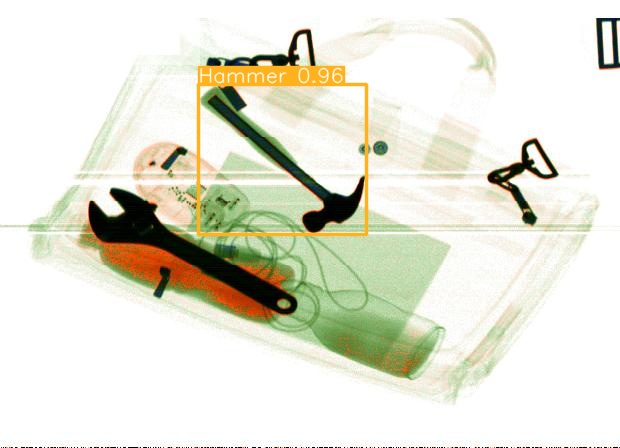

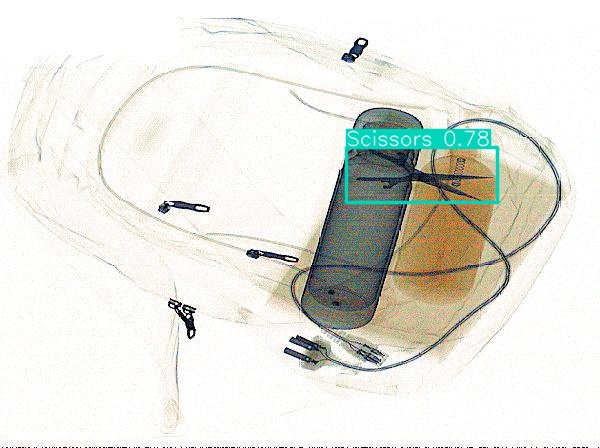

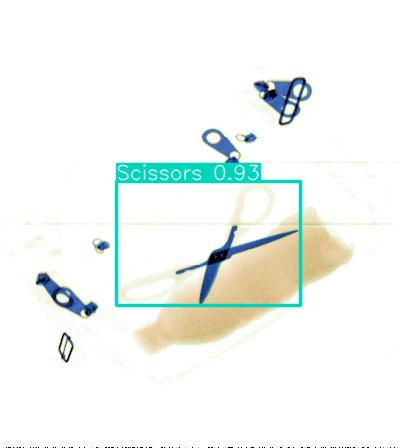

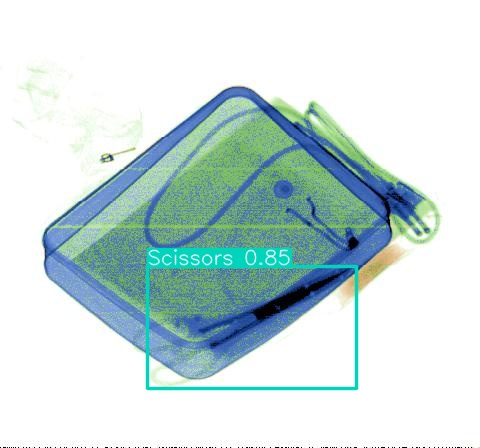

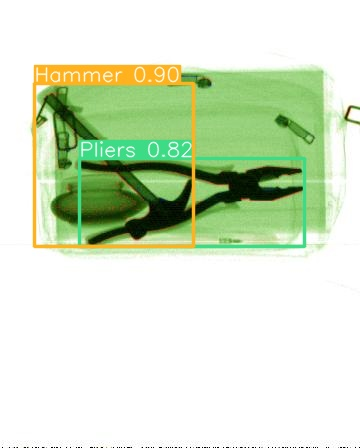

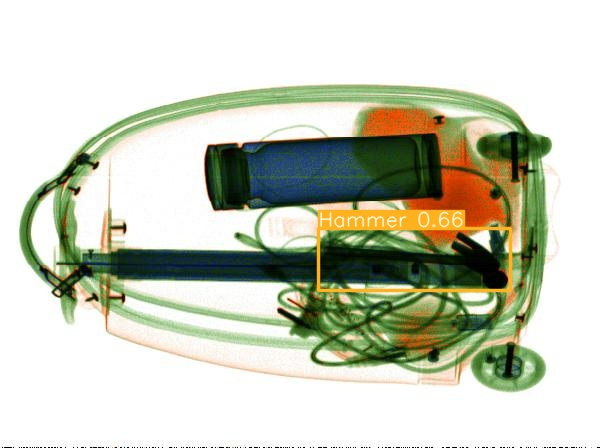

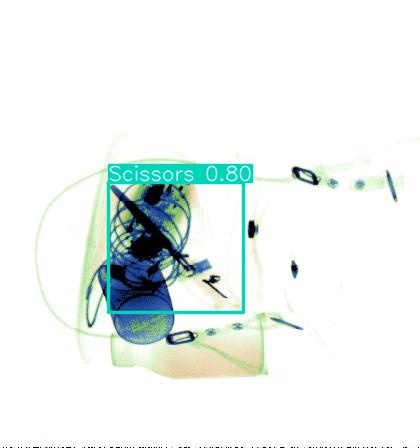

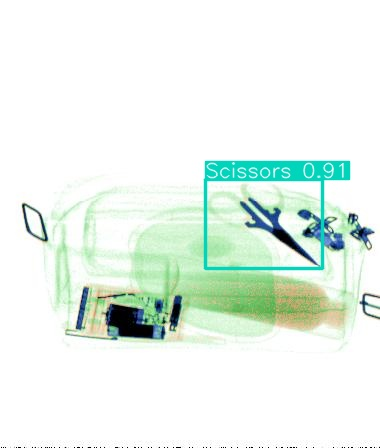

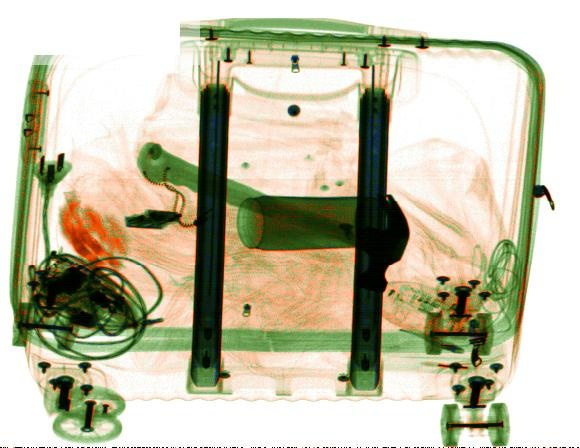

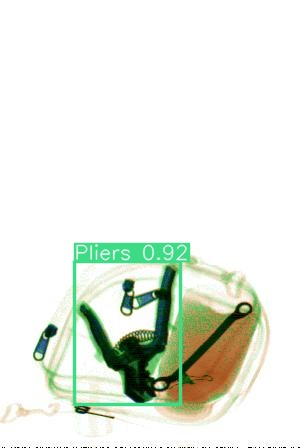

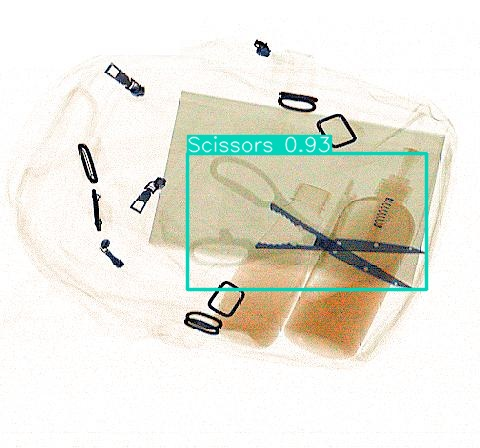

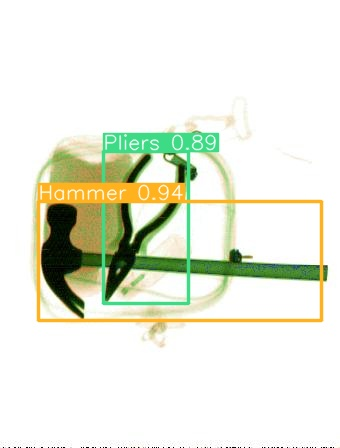

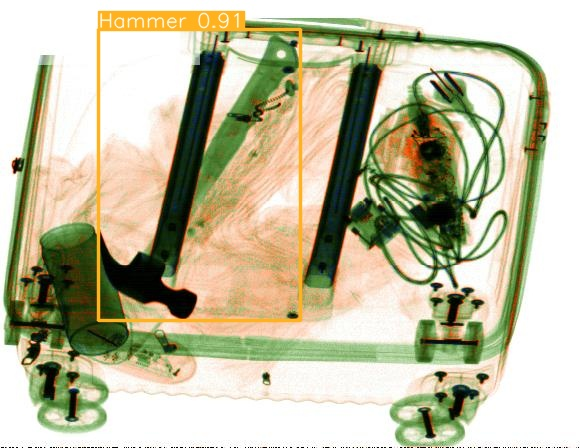

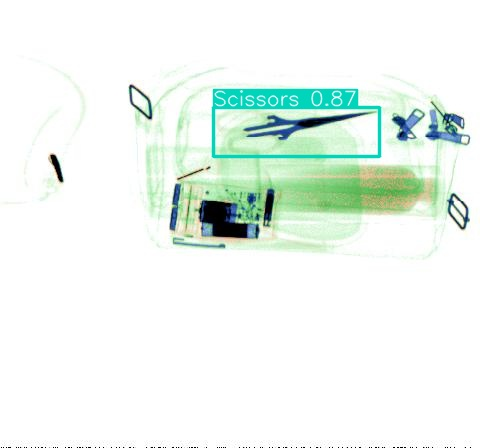

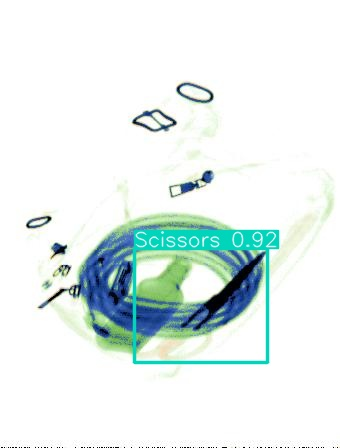

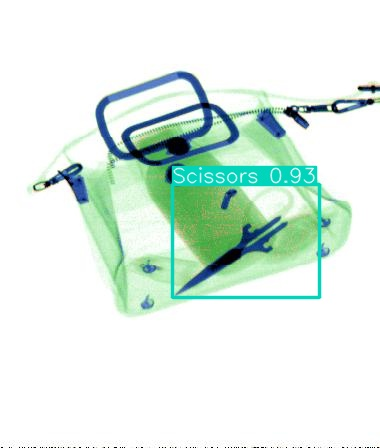

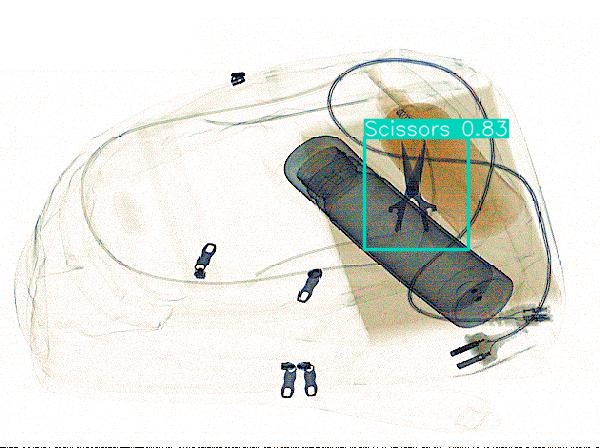

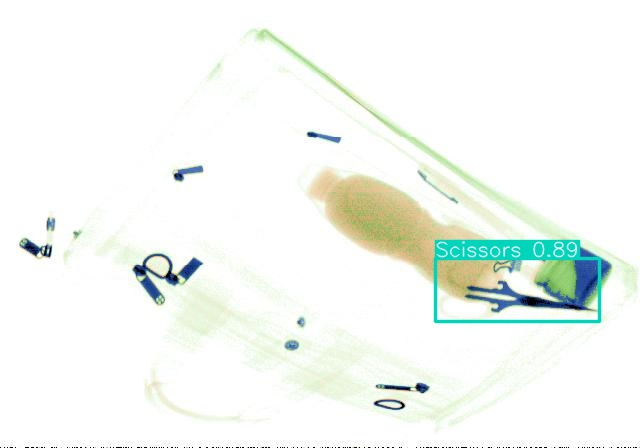

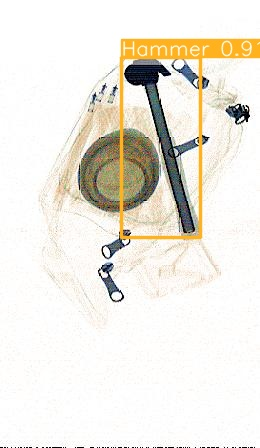

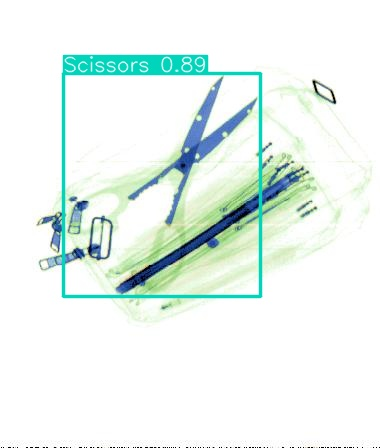

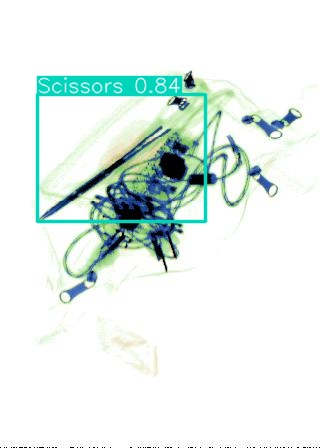

In [18]:
yolo8_model_detection=YOLO('YOLO_weights/SIXray_Output/weights/best.pt')
yolo8_model_detection.predict(source='/kaggle/working/PIDRAY-3/test/images', save=True )
from IPython.display import Image, display
import os
res_path='runs/detect/predict'
for image in os.listdir(res_path)[-25:]: # Displaying only 10 results
  # print(os.path.join(res_path,image))
  display(Image(filename=os.path.join(res_path,image), height=300,width=500))

# **MODEL BENCHMARK**

In [19]:
from ultralytics.utils.benchmarks import benchmark

# Benchmark on GPU with training configurations
benchmark(model= yolo8_model_detection, data='/kaggle/working/datasets/sixray100-1/data.yaml', imgsz=640, half=False, device=0)

Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5362.9/8062.4 GB disk)

Benchmarks complete for best.pt on /kaggle/working/datasets/sixray100-1/data.yaml at imgsz=640 (869.99s)
                   Format Status❔  Size (MB)  metrics/mAP50-95(B)  Inference time (ms/im)
0                 PyTorch       ✅        5.9               0.5927                    9.75
1             TorchScript       ✅       11.9               0.5934                    4.74
2                    ONNX       ✅       11.7               0.5934                    9.83
3                OpenVINO       ❌        0.0                  NaN                     NaN
4                TensorRT       ❎       15.2                  NaN                     NaN
5                  CoreML       ❌        0.0                  NaN                     NaN
6   TensorFlow SavedModel       ✅       29.3               0.5934                   17.89
7     TensorFlow GraphDef       ✅       11.7               0.5934                   15.45
8         TensorFlow L

,Format,Status❔,Size (MB),metrics/mAP50-95(B),Inference time (ms/im)
0,PyTorch,✅,5.9,0.5927,9.75
1,TorchScript,✅,11.9,0.5934,4.74
2,ONNX,✅,11.7,0.5934,9.83
3,OpenVINO,❌,0.0,NaN,NaN
4,TensorRT,❎,15.2,NaN,NaN
5,CoreML,❌,0.0,NaN,NaN
6,TensorFlow SavedModel,✅,29.3,0.5934,17.89
7,TensorFlow GraphDef,✅,11.7,0.5934,15.45
8,TensorFlow Lite,❌,0.0,NaN,NaN
9,TensorFlow Edge TPU,❌,0.0,NaN,NaN
